In [1]:
%matplotlib widget
import cartopy
import starepandas
import geopandas
import matplotlib.pyplot as plt

In [5]:
starepandas.datasets.available

['VNP03DNB.A2020219.0742.001.2020219124651.nc',
 'MODXX.hdf',
 'MODXX_stare.nc',
 'MOD05_L2.A2019336.0000.061.2019336211522.hdf',
 'VNP02DNB.A2020219.0742.001.2020219125654.nc',
 'VNP03MOD.A2020219.0742.001.2020219124651.nc',
 'VNP03DNB.A2020219.0742.001.2020219124651_stare.nc',
 'MOD05_L2.A2019336.0000.061.2019336211522_stare.nc']

In [19]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
europe = world[(world.continent=='Europe') & (world.name !='Russia')]#.plot()

In [24]:
sdf = starepandas.STAREDataFrame(europe)
sids = sdf.make_sids(level=10)
sdf = sdf.set_sids(sids)
sdf.add_trixels(inplace=True)

In [27]:
!wget https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip

--2022-09-20 16:15:03--  https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip
Resolving www2.census.gov (www2.census.gov)... 23.205.195.63, 2600:1406:3c:1a2::208c, 2600:1406:3c:198::208c
Connecting to www2.census.gov (www2.census.gov)|23.205.195.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2019_us_state.zip’

tl_2019_us_state.zi     [   <=>              ]   8.90M  19.4MB/s    in 0.5s    

2022-09-20 16:15:03 (19.4 MB/s) - ‘tl_2019_us_state.zip’ saved [9332961]



In [29]:
states = geopandas.read_file('tl_2019_us_state.zip')
states = starepandas.STAREDataFrame(states)
sids = states.make_sids(n_partitions=8, level=10)
states.set_sids(sids, inplace=True)
trixels = states.make_trixels(n_partitions=8, wrap_lon=False)
states.set_trixels(trixels, inplace=True)
states.split_antimeridian(inplace=True)

In [52]:
states = states[(states.NAME != 'Alaska') & (states.NAME!= 'Hawaii')]
#states

<GeoAxesSubplot:>

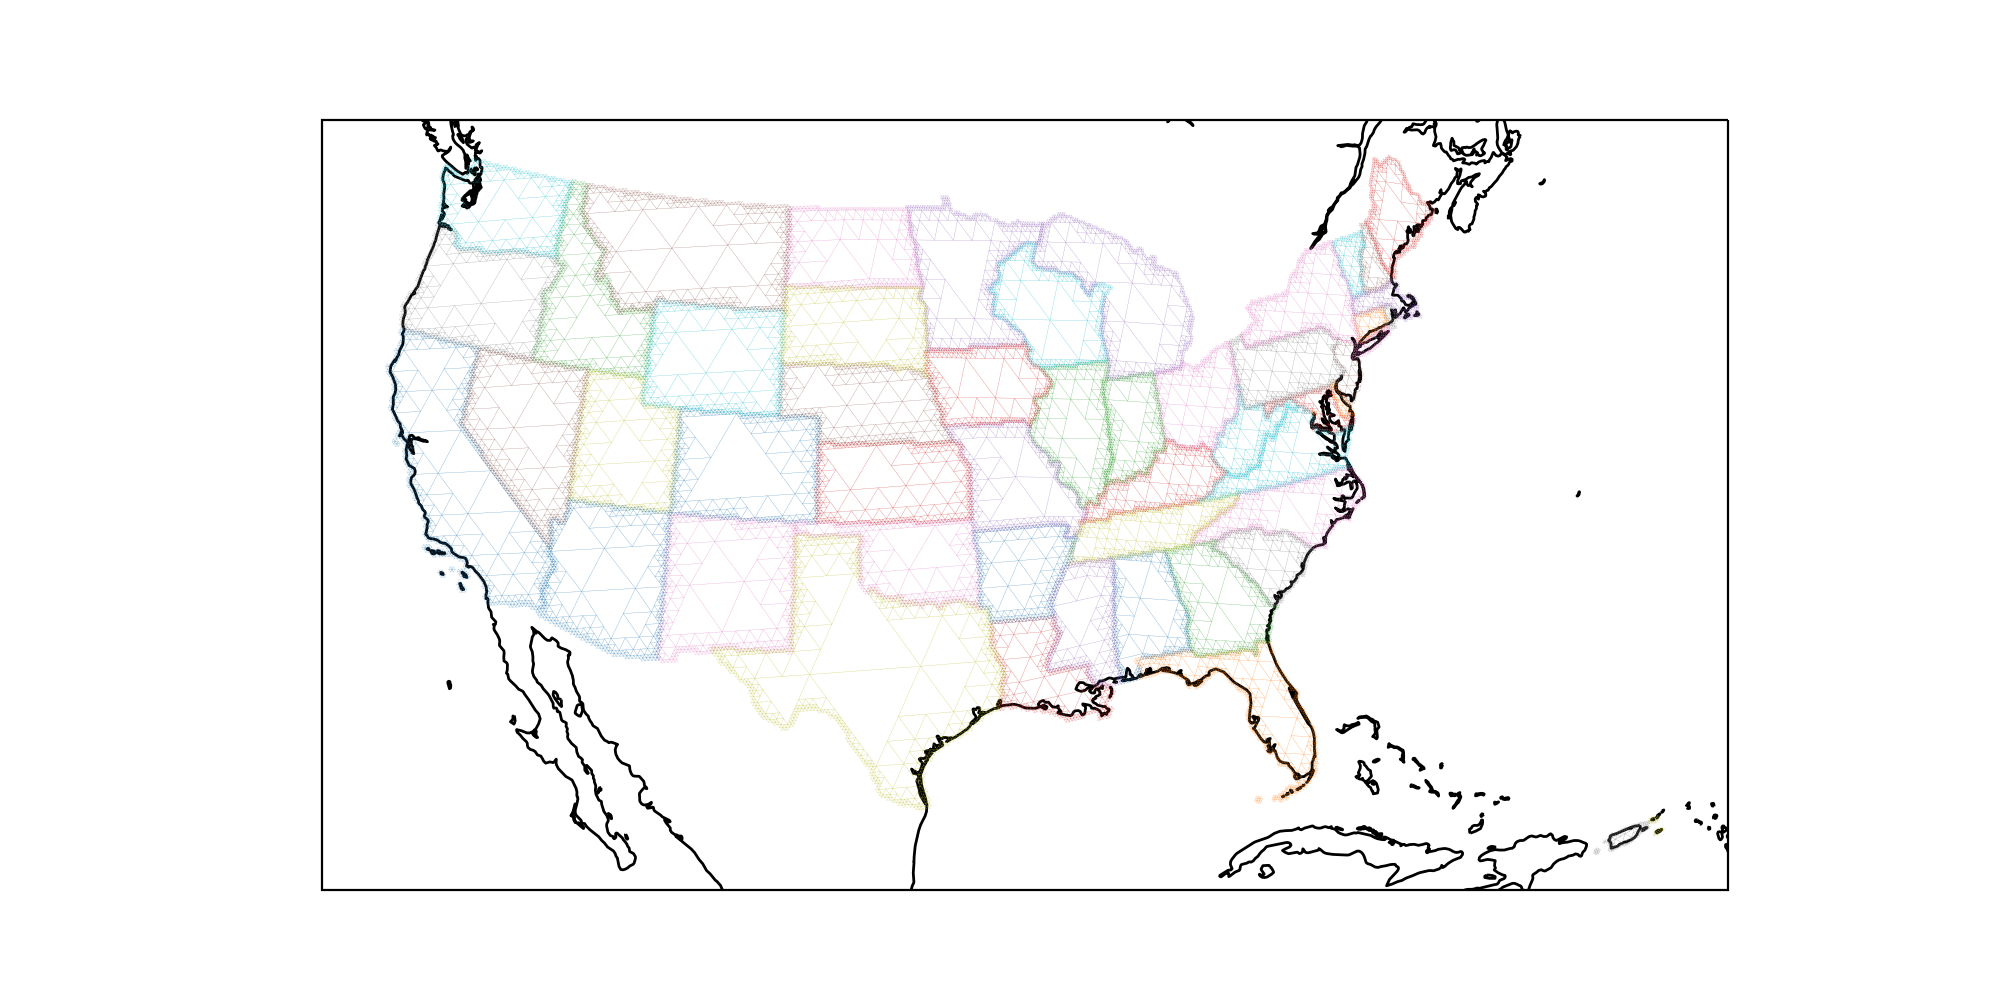

In [54]:
proj = cartopy.crs.NearsidePerspective(central_longitude=-100.0, 
                                       central_latitude=40, 
                                       satellite_height=35785831, 
                                       false_easting=0, 
                                       false_northing=0, globe=None)

transf = cartopy.crs.Geodetic()
opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(10, 5), dpi=200, subplot_kw=opts)
#proj._threshold = proj._threshold/20.
ax.coastlines()
#ax.stock_img()

opts = {'projection': proj}

states.plot(ax=ax, column='NAME', linewidth=0.1, alpha=0.4, transform=transf)